In [2]:
import matplotlib.pyplot as plt
from images_helpers import *
import numpy as np
from numpy import random

from scipy.ndimage.interpolation import rotate

## Train dataset augmentation
In this notebook we augment the training dataset with multiple rotations and symetry of the same image.

In [3]:
def rotate_and_flip(imgs, names):
    new_imgs = imgs.copy()
    new_names = names.copy()
    
    padded_imgs = pad_imgs(imgs, 566)
    rotated_imgs_right = rotate(padded_imgs, angle=-45, axes=(1, 2), order=0)
    rotated_imgs_left = rotate(padded_imgs, angle=45, axes=(1, 2), order=0)
    rotated_imgs_right = crop_imgs(rotated_imgs_right, 400)
    rotated_imgs_left = crop_imgs(rotated_imgs_left, 400)

    for idx, (img, name) in enumerate(zip(imgs, names)):

        new_imgs.append(np.rot90(img))
        new_names.append("rot90_" + name)

        new_imgs.append(np.rot90(img, 2))
        new_names.append("rot180_" + name)

        new_imgs.append(np.rot90(img, 3))
        new_names.append("rot270_" + name)

        new_imgs.append(np.flip(img, axis=[0]))
        new_names.append("flipX_" + name)

        new_imgs.append(np.flip(img, axis=[1]))
        new_names.append("flipY_" + name)

        new_imgs.append(np.flip(np.rot90(img,1), axis=[0]))
        new_names.append("rot90_flipX_" + name)

        new_imgs.append(np.flip(np.rot90(img,3), axis=[0]))
        new_names.append("rot270_flipX_" + name)
        
        new_imgs.append(np.flip(np.rot90(img,3), axis=[0]))
        new_names.append("rot270_flipX_" + name)
        
        new_imgs.append(rotated_imgs_right[idx])
        new_names.append("rot45_" + name)
        
        new_imgs.append(rotated_imgs_left[idx])
        new_names.append("rot315_" + name)
    
    print(f"{len(new_imgs)} transformed images added")

    return new_imgs, new_names

def split_indices(image_count,test_proportion=0.1):
    
    shuffled_indices = np.arange(image_count)
    random.shuffle(shuffled_indices)
    
    test_count = int(test_proportion*image_count)
    test_indices = shuffled_indices[:test_count]
    train_indices = shuffled_indices[test_count:]
                                      
    return train_indices, test_indices

In [4]:
#Fix seed for shuffle
random.seed(42)

imgs, names = load_images(TRAINING_IMAGE_DIR)
gts, names = load_images(TRAINING_GT_DIR)

train_indices,test_indices = split_indices(len(imgs))

train_imgs = [imgs[i] for i in train_indices]
train_gts = [gts[i] for i in train_indices]
train_names = [names[i] for i in train_indices]#Same name for gt and images

test_imgs = [imgs[i] for i in test_indices]
test_gts = [gts[i] for i in test_indices]
test_names = [names[i] for i in test_indices]

100 images loaded
100 images loaded


In [16]:
augmented_train_imgs, augmented_train_names = rotate_and_flip(train_imgs, train_names)
write_images_to_dir(AUGMENTED_IMAGE_TRAIN_DIR, augmented_train_imgs, augmented_train_names)

augmented_train_gts, augmented_train_names = rotate_and_flip(train_gts, train_names)
write_images_to_dir(AUGMENTED_GT_TRAIN_DIR, augmented_train_gts, augmented_train_names)

990 transformed images added
990 images saved
990 transformed images added
990 images saved


In [17]:
augmented_test_imgs, augmented_test_names = rotate_and_flip(test_imgs, test_names)
write_images_to_dir(AUGMENTED_IMAGE_TEST_DIR, augmented_test_imgs, augmented_test_names)

augmented_test_gts, augmented_test_names = rotate_and_flip(test_gts, test_names)
write_images_to_dir(AUGMENTED_GT_TEST_DIR, augmented_test_gts, augmented_test_names)

110 transformed images added
110 images saved
110 transformed images added
110 images saved


### Display all verions of the same image the augmented dataset

Text(0.5, 1.0, 'Rotation 315')

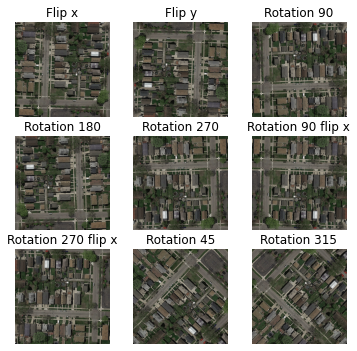

In [20]:
img = imgs[6]

fig = plt.figure(figsize=(6, 8))

rows = 4
columns = 3

#fig.add_subplot(rows, columns, 1)

#plt.imshow(img)
#plt.axis('off')
#plt.title("Original")

fig.add_subplot(rows, columns, 1)

plt.imshow(np.flip(img,axis=[0]))
plt.axis('off')
plt.title("Flip x")

fig.add_subplot(rows, columns, 2)

plt.imshow(np.flip(img,axis=[1]))
plt.axis('off')
plt.title("Flip y")

fig.add_subplot(rows, columns, 3)
plt.imshow(np.rot90(img,1))
plt.axis('off')
plt.title("Rotation 90")

fig.add_subplot(rows, columns, 4)
plt.imshow(np.rot90(img,2))
plt.axis('off')
plt.title("Rotation 180")

fig.add_subplot(rows, columns, 5)
plt.imshow(np.rot90(img,3))
plt.axis('off')
plt.title("Rotation 270")

fig.add_subplot(rows, columns, 6)
plt.imshow(np.flip(np.rot90(img,1), axis=[0]))
plt.axis('off')
plt.title("Rotation 90 flip x")
           
fig.add_subplot(rows, columns, 7)
plt.imshow(np.flip(np.rot90(img,3), axis=[0]))
plt.axis('off')
plt.title("Rotation 270 flip x")

padded_img = pad_imgs([img], 566)
rotated_img_right = rotate(padded_img, angle=-45, axes=(1, 2), order=0)
rotated_img_left = rotate(padded_img, angle=45, axes=(1, 2), order=0)
rotated_img_right = crop_imgs(rotated_img_right, 400)[0]
rotated_img_left = crop_imgs(rotated_img_left, 400)[0]

fig.add_subplot(rows, columns, 8)
plt.imshow(rotated_img_right)
plt.axis('off')
plt.title("Rotation 45")

fig.add_subplot(rows, columns, 9)
plt.imshow(rotated_img_left)
plt.axis('off')
plt.title("Rotation 315")


### Steps taken to create 45 rotation of an image

Text(0.5, 1.0, '45 rotation cropped')

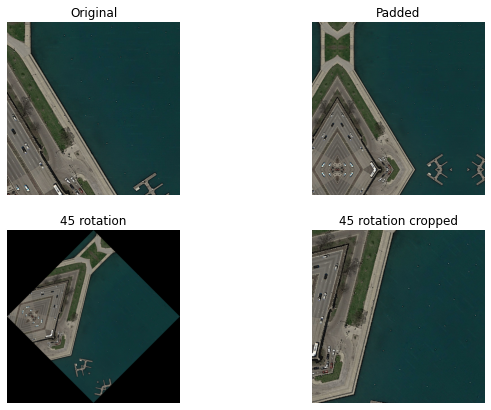

In [19]:
padded_img = pad_imgs([img], 566)
rotated_img_right = rotate(padded_img, angle=-45, axes=(1, 2), order=0)
rotated_img_left = rotate(padded_img, angle=45, axes=(1, 2), order=0)
img_right = crop_imgs(rotated_img_right, 400)
img_left = crop_imgs(rotated_img_left, 400)

fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(img)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)

plt.imshow(padded_img[0])
plt.axis('off')
plt.title("Padded")

fig.add_subplot(rows, columns, 3)

plt.imshow(rotated_img_right[0])
plt.axis('off')
plt.title("45 rotation")

fig.add_subplot(rows, columns, 4)

plt.imshow(img_right[0])
plt.axis('off')
plt.title("45 rotation cropped")